### Contents
    01. Imorting Libraries and Data
    02. Grouping data and aggregating variables
    03. Export

# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd

# Importing Data

In [2]:
# Set path 
path=r'/Users/aylaarreguin/07-15-2020 Instacart Basket Analysis/'

In [3]:
# Import Ord_prods_merged_ver2 from last exercise as df
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_merged_ver2.pkl'))

In [4]:
# check to make sure the new columns are in the data frame 
ords_prods_merge.head()

,order_id,customer_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id,prices,_merge,Busiest_day,busiest_days,busiest_period_of_day
0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Regularly_busy,Regularly_busy,Fewest Orders
1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Regularly_busy,Least_busy_days,Fewest Orders
2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Regularly_busy,Least_busy_days,Most Orders
3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Least_busy,Least_busy_days,Fewest Orders
4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Least_busy,Least_busy_days,Most Orders


They are not, so I need to export my work from the exercise 

In [5]:
# Import ords_prods_merge_ver3 from last exercise as df 
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_merged_ver3.pkl'))

In [6]:
# Check to see if this now has the new columns 
ords_prods_merge.head()

,order_id,customer_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id,prices,_merge,Busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag
0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Regularly_busy,Regularly_busy,Fewest Orders,10,New customer
1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Regularly_busy,Least_busy_days,Fewest Orders,10,New customer
2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Regularly_busy,Least_busy_days,Most Orders,10,New customer
3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Least_busy,Least_busy_days,Fewest Orders,10,New customer
4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Least_busy,Least_busy_days,Most Orders,10,New customer


Success! 

# Grouping Data and Aggregating 

In [7]:
# make a new df for ords_prods_merge
df=ords_prods_merge

In [8]:
# Group data by "department_id," and aggragate it by "order_number" to find the mean 
df.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
1,15.457838
2,17.277920
3,17.170395
4,17.811403
5,15.215751
6,16.439806
7,17.225802
8,15.340650


This result differs from the one in the exercise that was done on just the first 1,000,000 rows because it has the mean for ALL of the department_id 's in the full data frame. 

In [9]:
 # creating a loyalty flag for existing customers using the transform() and loc() functions
# 1 Create a new column called "max_order" 
# Group df dataframe by the “customer_id” column
# Use the transform() function to apply on the “order_number” column with the np.max argument

df['max_order'] = df.groupby(['customer_id'])['order_number'].transform(np.max)

In [10]:
# Check the df head()
df.head(15)

,order_id,customer_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id,prices,_merge,Busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag
0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Regularly_busy,Regularly_busy,Fewest Orders,10,New customer
1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Regularly_busy,Least_busy_days,Fewest Orders,10,New customer
2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Regularly_busy,Least_busy_days,Most Orders,10,New customer
3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Least_busy,Least_busy_days,Fewest Orders,10,New customer
4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Least_busy,Least_busy_days,Most Orders,10,New customer
5,3367565,1,6,2,7,19.0,196,1,1,195,Soda,77,7,9.0,both,Regularly_busy,Regularly_busy,Fewest Orders,10,New customer
6,550135,1,7,1,9,20.0,196,1,1,195,Soda,77,7,9.0,both,Regularly_busy,Busiest_days,Most Orders,10,New customer
7,3108588,1,8,1,14,14.0,196,2,1,195,Soda,77,7,9.0,both,Regularly_busy,Busiest_days,Most Orders,10,New customer
8,2295261,1,9,1,16,0.0,196,4,1,195,Soda,77,7,9.0,both,Regularly_busy,Busiest_days,Most Orders,10,New customer
9,2550362,1,10,4,8,30.0,196,1,1,195,Soda,77,7,9.0,both,Least_busy,Least_busy_days,Fewest Orders,10,New customer


In [11]:
# create a flag that assigns a “loyalty” label to a customer_id based on its corresponding max order value
df.loc[df['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
df.loc[(df['max_order'] <= 40) & (df['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
df.loc[df['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [12]:
# Check shape 
df.shape

(32404859, 20)

In [13]:
# print the frequency of your new “loyalty_flag” column
df['loyalty_flag'].value_counts(dropna=False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [14]:
# Checking that totals add up 
15876776+10284093+6243990

32404859

In [35]:
# Check statistics of product prices for each loyalty category
df.groupby('loyalty_flag').agg({'prices':['mean']})

,prices
,mean
loyalty_flag,
Loyal customer,10.386336
New customer,13.294670
Regular customer,12.495717


In [34]:
# Check the median days since prior order for each loyalty flag
df.groupby('loyalty_flag').agg({'days_since_prior_order':['median']})

,days_since_prior_order
,median
loyalty_flag,
Loyal customer,5.0
New customer,17.0
Regular customer,9.0


In [17]:
# Target customers based on spending
# Step 1 Create column of mean price by user
df['mean_order_price'] = df.groupby(['customer_id'])['prices'].transform(np.mean)

In [18]:
# Check shape to confirm new column 
df.shape

(32404859, 21)

In [19]:
# Check first 15 rows 
df.head(15)

,order_id,customer_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,aisle_id,department_id,prices,_merge,Busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price
0,2539329,1,1,2,8,NaN,196,1,0,195,...,77,7,9.0,both,Regularly_busy,Regularly_busy,Fewest Orders,10,New customer,6.367797
1,2398795,1,2,3,7,15.0,196,1,1,195,...,77,7,9.0,both,Regularly_busy,Least_busy_days,Fewest Orders,10,New customer,6.367797
2,473747,1,3,3,12,21.0,196,1,1,195,...,77,7,9.0,both,Regularly_busy,Least_busy_days,Most Orders,10,New customer,6.367797
3,2254736,1,4,4,7,29.0,196,1,1,195,...,77,7,9.0,both,Least_busy,Least_busy_days,Fewest Orders,10,New customer,6.367797
4,431534,1,5,4,15,28.0,196,1,1,195,...,77,7,9.0,both,Least_busy,Least_busy_days,Most Orders,10,New customer,6.367797
5,3367565,1,6,2,7,19.0,196,1,1,195,...,77,7,9.0,both,Regularly_busy,Regularly_busy,Fewest Orders,10,New customer,6.367797
6,550135,1,7,1,9,20.0,196,1,1,195,...,77,7,9.0,both,Regularly_busy,Busiest_days,Most Orders,10,New customer,6.367797
7,3108588,1,8,1,14,14.0,196,2,1,195,...,77,7,9.0,both,Regularly_busy,Busiest_days,Most Orders,10,New customer,6.367797
8,2295261,1,9,1,16,0.0,196,4,1,195,...,77,7,9.0,both,Regularly_busy,Busiest_days,Most Orders,10,New customer,6.367797
9,2550362,1,10,4,8,30.0,196,1,1,195,...,77,7,9.0,both,Least_busy,Least_busy_days,Fewest Orders,10,New customer,6.367797


In [20]:
# Assign spending flag based on average price

df.loc[df['mean_order_price']<10, 'spending_flag'] = 'Low spender'
df.loc[df['mean_order_price']>=10, 'spending_flag'] = 'High spender'

In [21]:
df['spending_flag'].value_counts(dropna=False)

Low spender     31770614
High spender      634245
Name: spending_flag, dtype: int64

In [38]:
# Check the spending habits of loyalty flags
cross = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna=False).sort_index()
cross

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,114831,6129159
Regular customer,302814,15573962


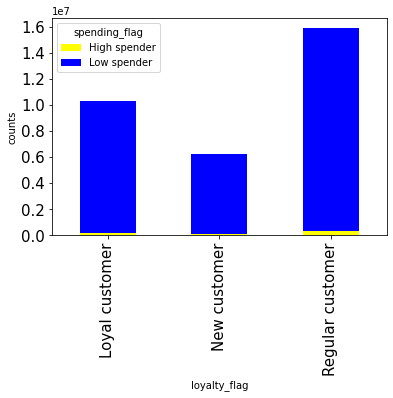

In [46]:
# stacked bar chart for loyalty flag and spending flag
loyalty_spending_bar=df.groupby('loyalty_flag')['spending_flag'].value_counts().unstack().plot.bar(stacked=True,
                                                    ylabel='counts',color=['yellow','blue'], fontsize=15)

In [22]:
df.head(100)

,order_id,customer_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,department_id,prices,_merge,Busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag
0,2539329,1,1,2,8,NaN,196,1,0,195,...,7,9.0,both,Regularly_busy,Regularly_busy,Fewest Orders,10,New customer,6.367797,Low spender
1,2398795,1,2,3,7,15.0,196,1,1,195,...,7,9.0,both,Regularly_busy,Least_busy_days,Fewest Orders,10,New customer,6.367797,Low spender
2,473747,1,3,3,12,21.0,196,1,1,195,...,7,9.0,both,Regularly_busy,Least_busy_days,Most Orders,10,New customer,6.367797,Low spender
3,2254736,1,4,4,7,29.0,196,1,1,195,...,7,9.0,both,Least_busy,Least_busy_days,Fewest Orders,10,New customer,6.367797,Low spender
4,431534,1,5,4,15,28.0,196,1,1,195,...,7,9.0,both,Least_busy,Least_busy_days,Most Orders,10,New customer,6.367797,Low spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3226575,360,1,5,12,NaN,196,1,0,195,...,7,9.0,both,Regularly_busy,Regularly_busy,Most Orders,3,New customer,10.006250,High spender
96,1469869,377,3,5,17,3.0,196,9,0,195,...,7,9.0,both,Regularly_busy,Regularly_busy,Fewest Orders,3,New customer,8.496552,Low spender
97,1927023,387,2,4,10,22.0,196,3,0,195,...,7,9.0,both,Least_busy,Least_busy_days,Most Orders,8,New customer,7.396610,Low spender
98,858092,420,4,1,19,30.0,196,2,0,195,...,7,9.0,both,Regularly_busy,Busiest_days,Fewest Orders,22,Regular customer,7.387805,Low spender


In [23]:
# Target customers based on order frequency flag that marks the regularity
# of a user’s ordering behavior according to the median in the “days_since_prior_order” column
# Step 1: Create column of median "days_since_prior_order" by customer 
df['order_frequency'] = df.groupby(['customer_id'])['days_since_prior_order'].transform(np.median)

In [24]:
# Check shape of df to make sure new column was successfully created 
df.shape 

(32404859, 23)

In [25]:
# Assign frequency flag based on regularity of user's ordering behavior (based on median days since prior order)

df.loc[df['order_frequency']>20, 'frequency_flag'] = 'Non-frequent customer'
df.loc[(df['order_frequency']>10) & (df['order_frequency']<=20), 'frequency_flag'] = 'Regular customer'
df.loc[df['order_frequency']<=10, 'frequency_flag'] = 'Frequent customer'


In [26]:
df.head(100)

,order_id,customer_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,_merge,Busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,order_frequency,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,195,...,both,Regularly_busy,Regularly_busy,Fewest Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,195,...,both,Regularly_busy,Least_busy_days,Fewest Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,195,...,both,Regularly_busy,Least_busy_days,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,195,...,both,Least_busy,Least_busy_days,Fewest Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,195,...,both,Least_busy,Least_busy_days,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3226575,360,1,5,12,NaN,196,1,0,195,...,both,Regularly_busy,Regularly_busy,Most Orders,3,New customer,10.006250,High spender,4.0,Frequent customer
96,1469869,377,3,5,17,3.0,196,9,0,195,...,both,Regularly_busy,Regularly_busy,Fewest Orders,3,New customer,8.496552,Low spender,16.5,Regular customer
97,1927023,387,2,4,10,22.0,196,3,0,195,...,both,Least_busy,Least_busy_days,Most Orders,8,New customer,7.396610,Low spender,8.0,Frequent customer
98,858092,420,4,1,19,30.0,196,2,0,195,...,both,Regularly_busy,Busiest_days,Fewest Orders,22,Regular customer,7.387805,Low spender,7.0,Frequent customer


In [27]:
# Check the shape of df 
df.shape

(32404859, 24)

In [28]:
# Check the frequency flag 
df['frequency_flag'].value_counts(dropna = False)

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: frequency_flag, dtype: int64

In [29]:
# Export new file as pkl
df.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ords_prods_merged_flags.pkl'))